`Work was done 29.03.2020`

## О чём
Цель данного ноутбука попрактиковаться в задаче визуализации и предварительного анализа данных.

Данные взять из открытого набора данных [отсюда](https://www.kaggle.com/kemical/kickstarter-projects)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks")

In [2]:
data = pd.read_csv('ks-projects-201801.csv')

In [3]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

Нас не интересует колонка с `ID` проекта

Также, чтобы не мучаться с валютами и прочем, будем использовать переведенные специально для нас в единую валюту с учетом комиссии колонки `usd_pledged_real` и `usd_goal_real`

Ненужные колонки выкинем.

In [5]:
data.goal = data.usd_goal_real
data.pledged = data.usd_pledged_real

In [6]:
data.drop(columns=['ID', 'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'currency'], inplace=True)

In [7]:
data.head()

,name,category,main_category,deadline,goal,launched,pledged,state,backers,country
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,1533.95,2015-08-11 12:12:28,0.0,failed,0,GB
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,30000.00,2017-09-02 04:43:57,2421.0,failed,15,US
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,45000.00,2013-01-12 00:20:50,220.0,failed,3,US
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,5000.00,2012-03-17 03:24:11,1.0,failed,1,US
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,19500.00,2015-07-04 08:35:03,1283.0,canceled,14,US


Посмотрим сколько проектов какой статус имеют

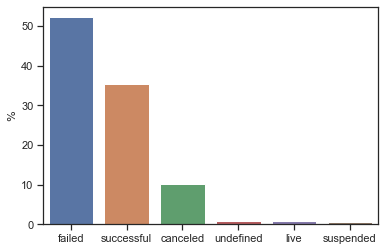

In [8]:
state = round(data["state"].value_counts() / len(data["state"]) * 100, 2)
ax = sns.barplot(state.index, state.values)
ax.set(ylabel='%')
plt.show()

Видно, что самые жирные категории это неуспешные и успешные запуски, так же около 10% отмененных. Остальные категории особо веса не имеют

Поэтому отбросим их, сосредоточимся на самом интересном

In [9]:
data = data.loc[data.state.isin(['successful', 'failed'])]

Посмотрим распределения успешных и неуспешных проектов

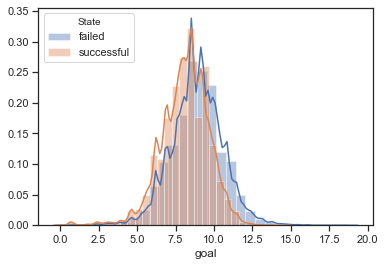

In [10]:
failed = np.log1p(data[data.state == 'failed'].goal)
success = np.log1p(data[data.state == 'successful'].goal)
sns.distplot(failed, bins=30, norm_hist=True)
sns.distplot(success, bins=30, norm_hist=True)
plt.legend(title='State', loc='upper left', labels=['failed', 'successful'])
plt.show()

Похоже, что успешные проекты обычно просят чуть меньше денег, чем неуспешные...тем не менее, в целом примерно одинаково

Посмотрим распределения сколько просят и сколько задонатили

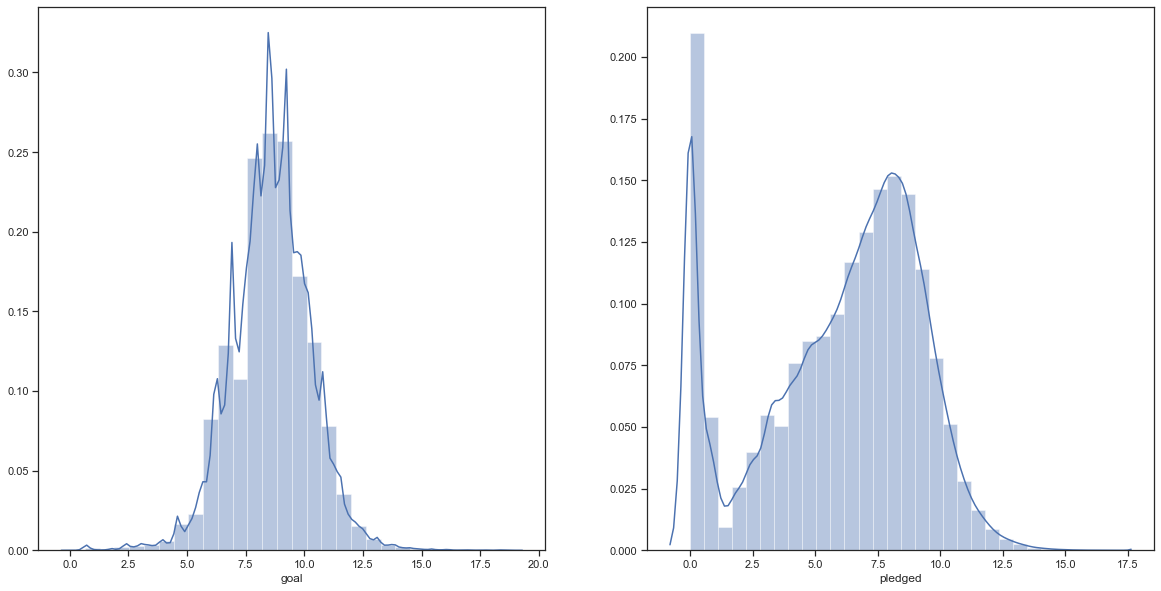

In [11]:
goal = np.log1p(data.goal)
pledged = np.log1p(data.pledged)
fig, axs = plt.subplots(figsize=[20, 10], ncols=2)
sns.distplot(goal, bins=30, norm_hist=True, ax=axs[0])
sns.distplot(pledged, bins=30, norm_hist=True, ax=axs[1])
plt.show()

Такой результат намекает, что неплохо было бы проверить распределение goal на нормальность (провести тест Шапиро, например). И возможно ещё посмотреть на однородность goal всех данных и отдельно успешных проектов...

Чтобы получше оценить этот момент, можно построить боксплоты

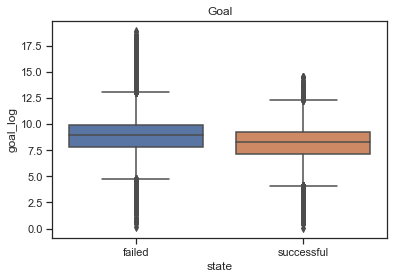

In [12]:
sns.boxplot(x=data.state, y=goal)
plt.ylabel('goal_log')
plt.title('Goal')
plt.show()

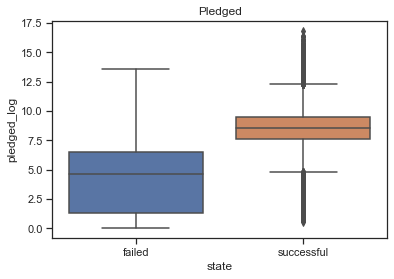

In [13]:
sns.boxplot(x=data.state, y=pledged)
plt.ylabel('pledged_log')
plt.title('Pledged')
plt.show()

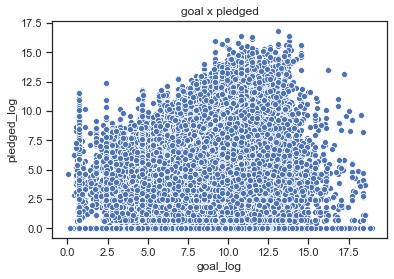

In [14]:
sns.scatterplot(x=goal, y=pledged)
plt.title('goal x pledged')
plt.xlabel('goal_log')
plt.ylabel('pledged_log')
plt.show()

По такой визуализации можно делать статистические выводы без проведения тестов, например, видно, что средние pledged значительно отличаются => распределения pledged разные в зависимости от статуса проекта.

Окей, пожалуй с деньгами пока всё, повизуализируем информацию о категориях

In [15]:
main_cats = data.main_category.value_counts()
main_cats_fail = data[data.state == 'failed'].main_category.value_counts()
main_cats_suc = data[data.state == 'successful'].main_category.value_counts()

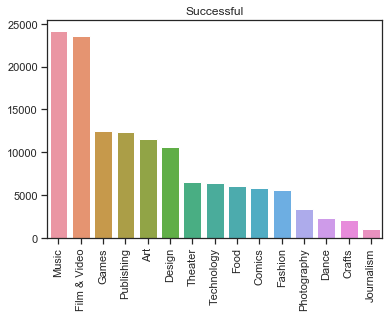

In [16]:
ax = sns.barplot(x=main_cats_suc.index, y=main_cats_suc.values)
ax.set_xticklabels(main_cats_suc.index, rotation=90)
plt.title('Successful')
plt.show()

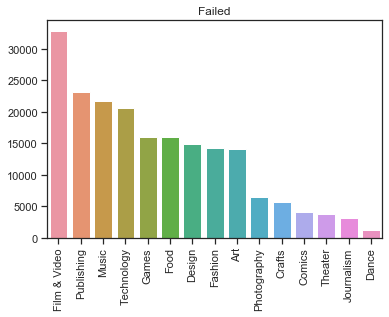

In [17]:
ax = sns.barplot(x=main_cats_fail.index, y=main_cats_fail.values)
ax.set_xticklabels(main_cats_fail.index, rotation=90)
plt.title('Failed')
plt.show()

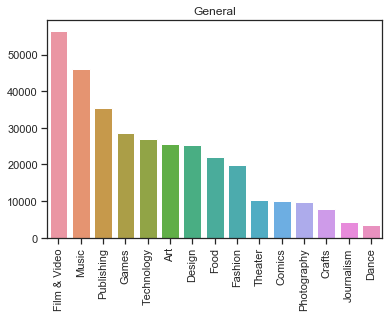

In [18]:
ax = sns.barplot(x=main_cats.index, y=main_cats.values)
ax.set_xticklabels(main_cats.index, rotation=90)
plt.title('General')
plt.show()

Отлично, можно заметить, что успешные и неуспешные проекты имеют разную частоту встречаемости тех или иных категория (в том числе, порядок не сохраняется)

~продолжаем пытаться делать осмысленную визуализацию~ Посмотрим какие подкатегории самые частые у топ2 успешных и неуспешных категорий

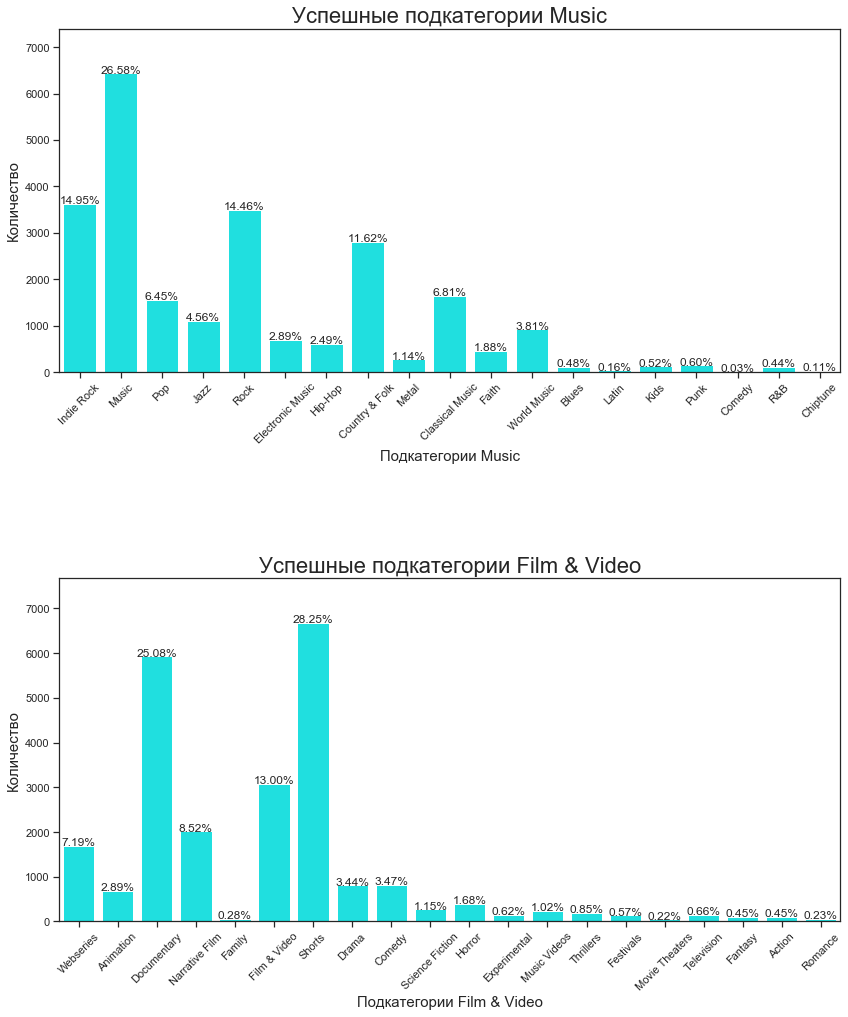

In [19]:
suc_music = data[(data.main_category == 'Music') & (data.state == 'successful')]
suc_film = data[(data.main_category == 'Film & Video') & (data.state == 'successful')]
plt.figure(figsize=(14,16))
plt.subplot(211)
ax0 = sns.countplot(x='category', data=suc_music, color='cyan')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45)
ax0.set_title("Успешные подкатегории Music", fontsize=22)
ax0.set_xlabel("Подкатегории Music", fontsize=15)
ax0.set_ylabel("Количество", fontsize=15)
sizes=[]
for p in ax0.patches:
    height = p.get_height()
    sizes.append(height)
    ax0.text(p.get_x()+p.get_width()/2, height + 3, f'{height/len(suc_music)*100:.2f}%', ha="center", fontsize=12) 
ax0.set_ylim(0, max(sizes) * 1.15)
plt.subplot(212)
ax1 = sns.countplot(x='category', data=suc_film, color='cyan')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title('Успешные подкатегории Film & Video', fontsize=22)
ax1.set_xlabel('Подкатегории Film & Video', fontsize=15)
ax1.set_ylabel('Количество', fontsize=15)
sizes=[]
for p in ax1.patches:
    height = p.get_height()
    sizes.append(height)
    ax1.text(p.get_x()+p.get_width()/2, height + 3, f'{height/len(suc_film)*100:.2f}%', ha='center', fontsize = 12)
ax1.set_ylim(0, max(sizes) * 1.15)

plt.subplots_adjust(wspace = 0.3, hspace = 0.6,top = 0.9)
plt.show()

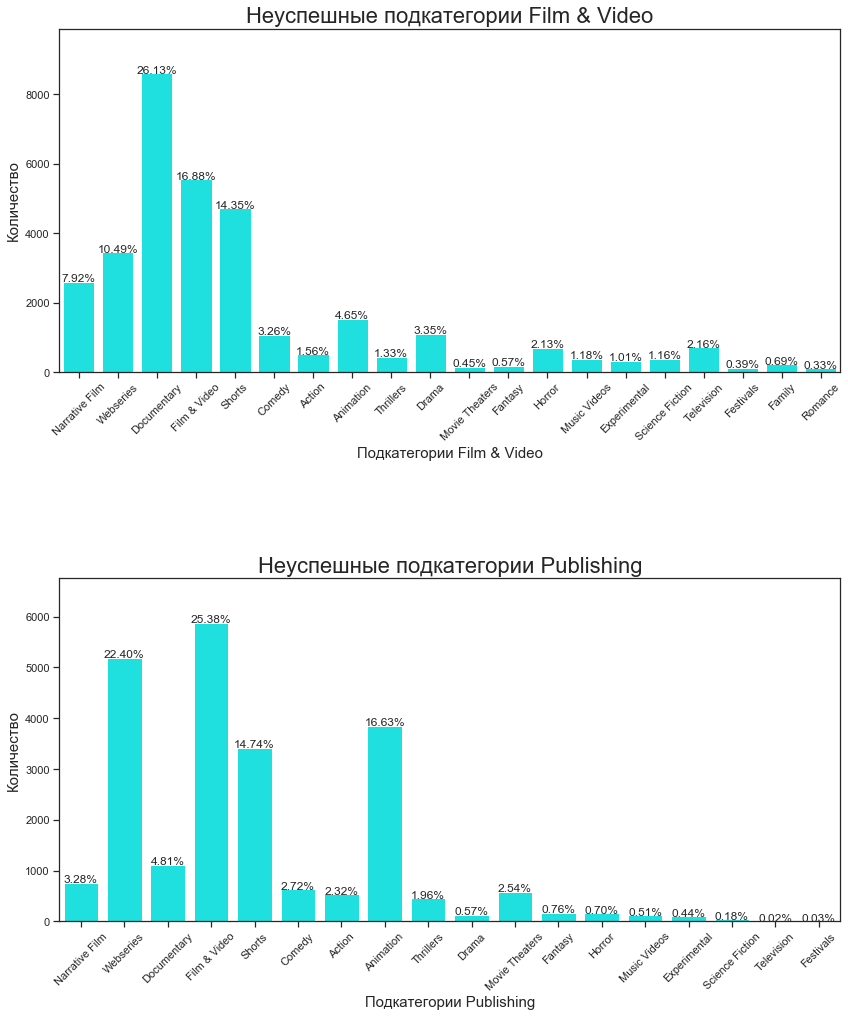

In [20]:
fail_film = data[(data.main_category == 'Film & Video') & (data.state == 'failed')]
fail_pub = data[(data.main_category == 'Publishing') & (data.state == 'failed')]
plt.figure(figsize=(14,16))
plt.subplot(211)
ax0 = sns.countplot(x='category', data=fail_film, color='cyan')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45)
ax0.set_title('Неуспешные подкатегории Film & Video', fontsize=22)
ax0.set_xlabel('Подкатегории Film & Video', fontsize=15)
ax0.set_ylabel('Количество', fontsize=15)
sizes=[]
for p in ax0.patches:
    height = p.get_height()
    sizes.append(height)
    ax0.text(p.get_x()+p.get_width()/2, height + 3, f'{height/len(fail_film)*100:.2f}%', ha='center', fontsize = 12)
ax0.set_ylim(0, max(sizes) * 1.15)

plt.subplot(212)
ax1 = sns.countplot(x='category', data=fail_pub, color='cyan')
ax1.set_xticklabels(ax0.get_xticklabels(), rotation=45)
ax1.set_title('Неуспешные подкатегории Publishing', fontsize=22)
ax1.set_xlabel('Подкатегории Publishing', fontsize=15)
ax1.set_ylabel('Количество', fontsize=15)
sizes=[]
for p in ax1.patches:
    height = p.get_height()
    sizes.append(height)
    ax1.text(p.get_x()+p.get_width()/2, height + 3, f'{height/len(fail_pub)*100:.2f}%', ha='center', fontsize = 12)
ax1.set_ylim(0, max(sizes) * 1.15)

plt.subplots_adjust(wspace = 0.3, hspace = 0.6,top = 0.9)
plt.show()

Что же, из интересного можно наблюдать, что распределения подкатегорий по успешности категории фильмы разные, что означает различную популярность у народа и наталкивает на мысль какой фильм/видео делать, если хочешь быть успешным кикстартером

Чуток визуализации по времени

In [21]:
data.columns

Index(['name', 'category', 'main_category', 'deadline', 'goal', 'launched',
       'pledged', 'state', 'backers', 'country'],
      dtype='object')

In [22]:
data.launched = pd.to_datetime(data.launched)
data.deadline = pd.to_datetime(data.deadline)

data['lon_year'] = data.launched.dt.year
data['lon_month'] = data.launched.dt.month
year = data.lon_year.value_counts()
month = data.lon_month.value_counts()

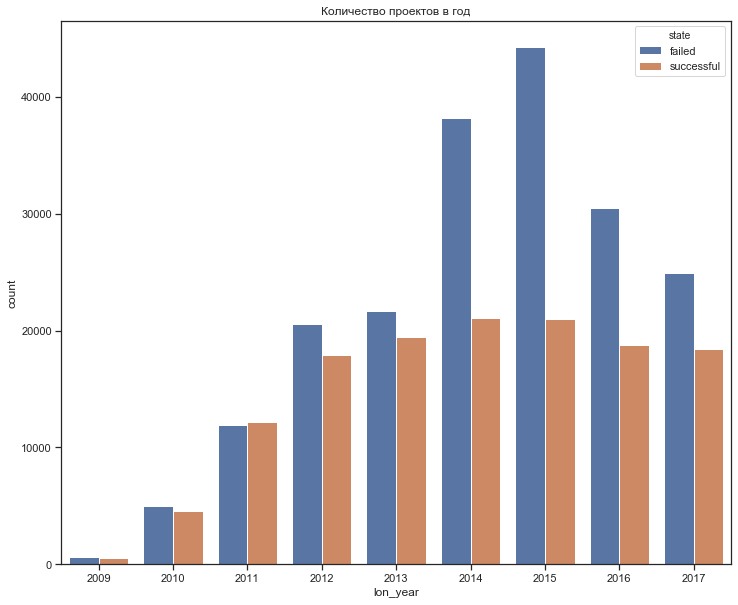

In [23]:
plt.figure(figsize=(12,10))
sns.countplot(x="lon_year", hue='state', data=data)
plt.title('Количество проектов в год')
plt.show()

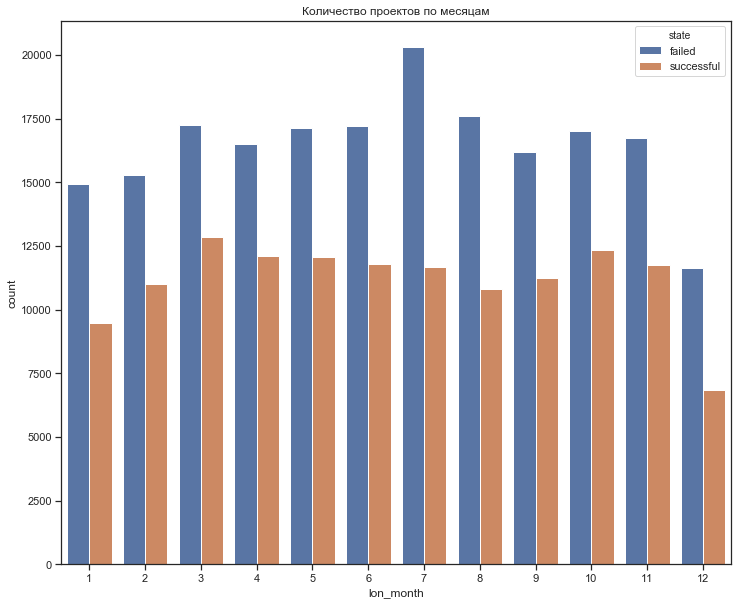

In [24]:
plt.figure(figsize=(12,10))
sns.countplot(x='lon_month', hue='state', data=data)
plt.title('Количество проектов по месяцам')
plt.show()

In [25]:
# посчитаем сколько длился сбор средств (длительность кампании)
data['time'] = (data['deadline'] - data['launched']).dt.days
data['time'] = data['time'].astype(int)

data = data[data['time'] != 14867]
data['time'] = round(data['time'] / 30 )

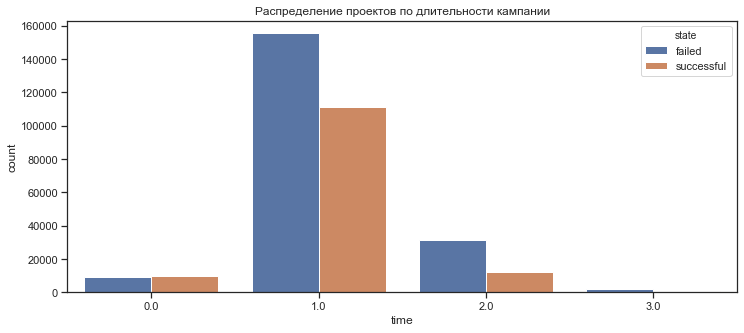

In [26]:
plt.figure(figsize = (12,5))
sns.countplot(x='time', hue='state', data=data)
plt.title('Распределение проектов по длительности кампании')
plt.show()

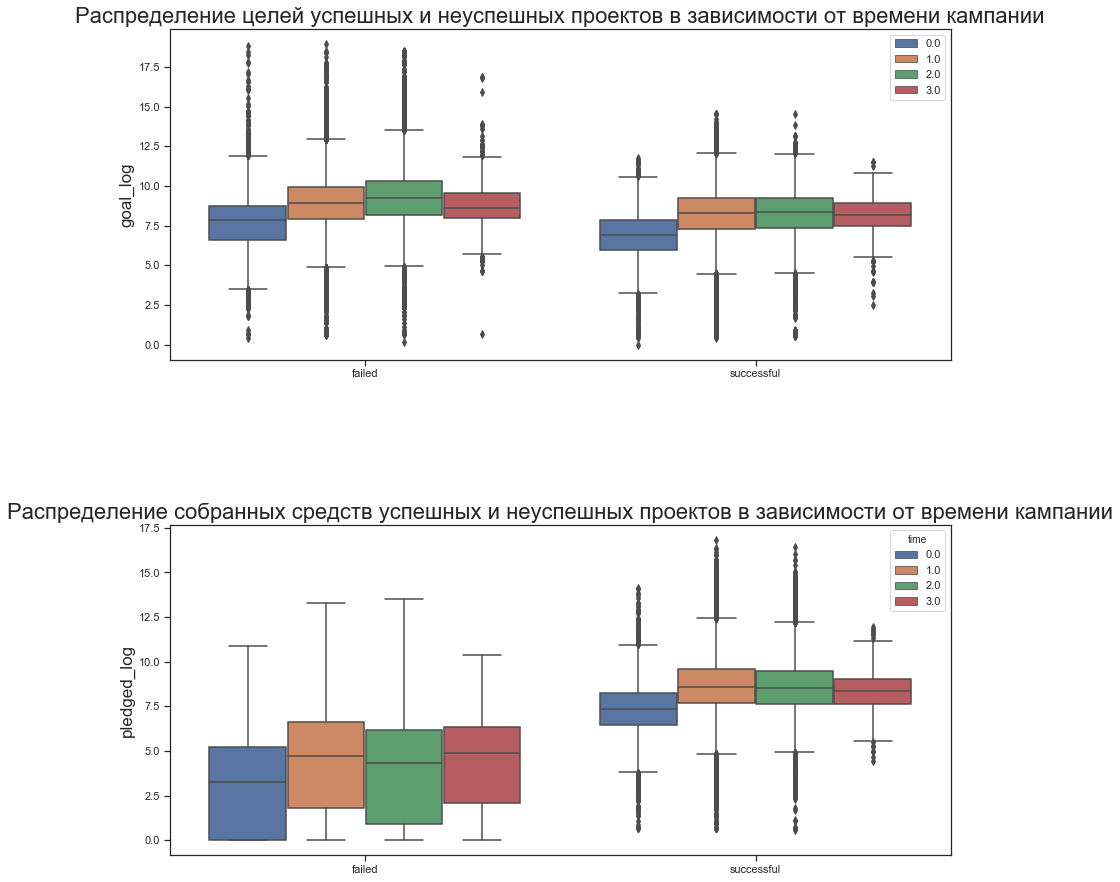

In [27]:
plt.figure(figsize = (14,17))

plt.subplot(211)
g =sns.boxplot(x='state', y=np.log1p(data.goal), data=data, hue='time')
g.set_title("Распределение целей успешных и неуспешных проектов в зависимости от времени кампании", fontsize=22)
g.set_xlabel("", fontsize=17)
g.set_ylabel("goal_log", fontsize=17)
g.legend(loc='upper right')

plt.subplot(212, sharex=g)
g1 = sns.boxplot(x='state', y=np.log1p(data.pledged), data=data, hue='time')
g1.set_title("Распределение собранных средств успешных и неуспешных проектов в зависимости от времени кампании", fontsize=22)
g1.set_xlabel("", fontsize=17)
g1.set_ylabel("pledged_log", fontsize=17)


plt.subplots_adjust(hspace = 0.50, top = 0.8)
plt.show()

Выводы ~поспешные~ слишком долгая кампания - плохо, слишком короткая - тоже. Не хочешь быть неудачником? - Не запускайся в середине года (7й месяц).

Напоследок посмотрим распределение количества покровителей у проектов.

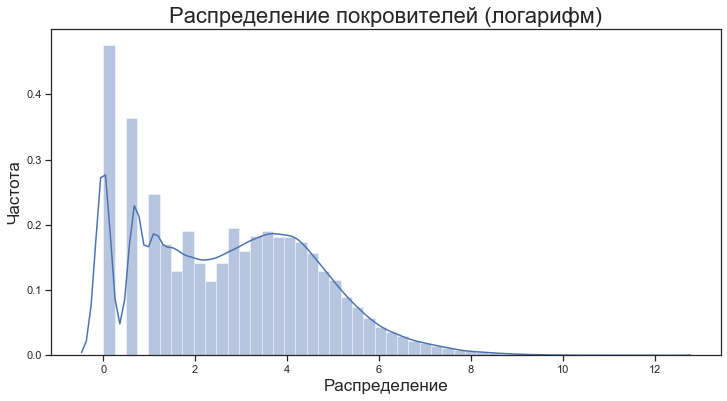

In [28]:
plt.figure(figsize = (12,6))
ax = sns.distplot(np.log1p(data.backers))
ax.set_xlabel("Распределение", fontsize=17)
ax.set_ylabel("Частота", fontsize=17)
ax.set_title("Распределение покровителей (логарифм)", fontsize=22)
plt.show()

Сделаем крутое облако слов из самых успешных жанров музыки!

In [29]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

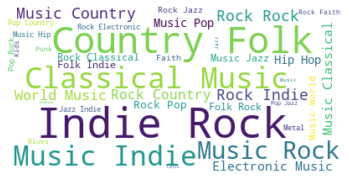

In [30]:
text = suc_music.category.to_string()
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()